In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
def check_df(dataframe, head = 5):
    print("################# Shape ####################")
    print(dataframe.shape)
    print("################# Types ####################")
    print(dataframe.dtypes)
    print("################# Head ####################")
    print(dataframe.head(head)) 
    print("################# Tail ####################")
    print(dataframe.tail(head))
    print("################# NA ####################")
    print(dataframe.isnull().sum())
    print("################# Quentiles ####################")
    print(dataframe.describe([0,0.05,0.5,0.95,0.99,1]).T)
    
check_df(df)

################# Shape ####################
(891, 15)
################# Types ####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
################# Head ####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   y

In [3]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [4]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [6]:
df["sex"].nunique()

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#  Kategorik Değişken Analizi

In [10]:
# veri tipi kategorik olanlar için
cat_cols = [col for col in (df.columns) if str(df[col].dtypes) in ["category","object","bool"] ]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [27]:
# veri tipi kategorik olmasa bile kategorik davranış gösterenler için
num_but_cat = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"] and df[col].nunique() < 10]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [30]:
# kategorik ama çok fazla farklı sayıda unique değer alıyor ise;
cat_but_car =[col for col in df.columns if str(df[col].dtypes) in  ["category","object","bool"] and df[col].nunique() > 10 ]
cat_but_car
#burda yok ama oladabilir bunu göz önünde bulundurmamız şart

[]

In [31]:
cat_cols = cat_cols + num_but_cat

cat_cols = [col for col in cat_cols if col not in cat_but_car]

cat_cols


['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [32]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0


In [35]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [37]:
num_cat = [col for col in df.columns if col not in cat_cols]
num_cat

['age', 'fare']

In [46]:
#fonk hangi sınıftan kaçar tane olduğu bilgisin alsın,sınıfların yüzdelik bilgisini yazsın

def cat_summary(dataframe,col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                                                                  "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    

cat_summary(df,"sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


In [47]:
for col in cat_cols:
    cat_summary(df,col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##############################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############################
     alive      Ratio
no     549  61.616162
yes    342  38.383

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


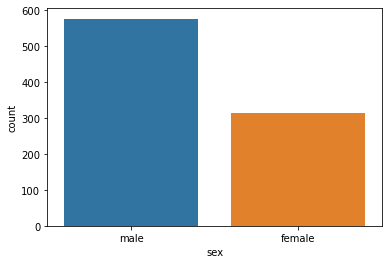

In [49]:
def cat_summary(dataframe,col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                                                                  "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)
cat_summary(df,"sex",plot = True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


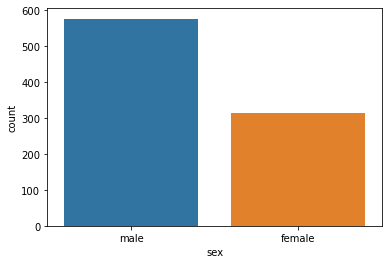

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################


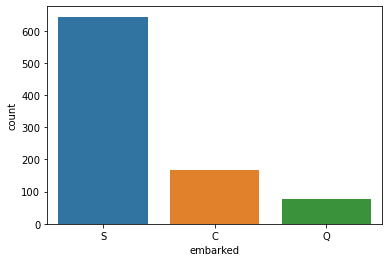

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############################


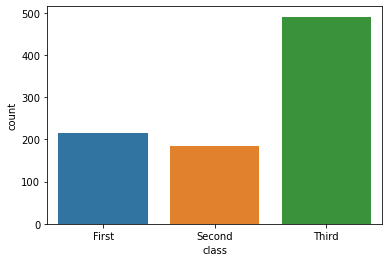

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############################


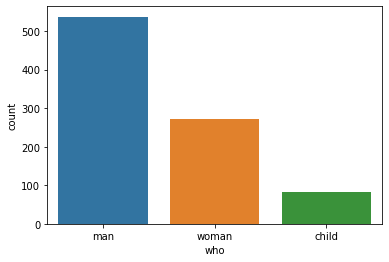

veri tipi bool
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############################


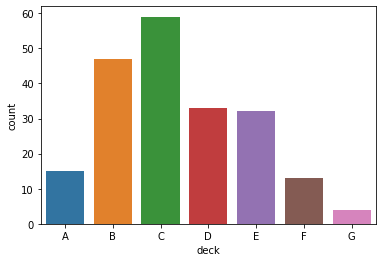

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############################


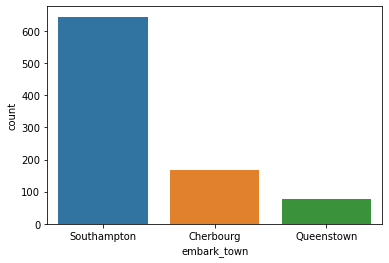

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##############################


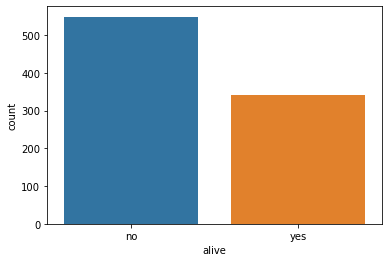

veri tipi bool
   survived      Ratio
0       549  61.616162
1       342  38.383838
##############################


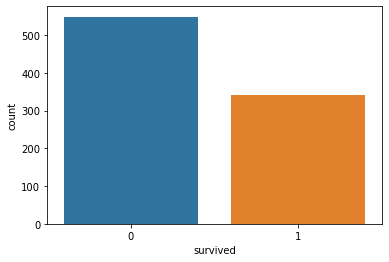

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##############################


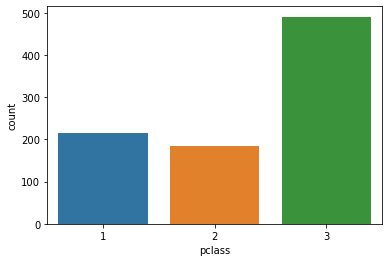

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##############################


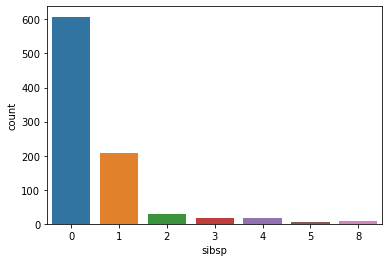

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##############################


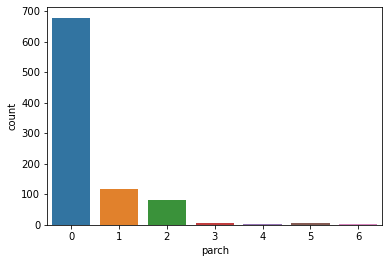

In [54]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print("veri tipi bool")
    else:
        cat_summary(df,col,plot = True)

In [55]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

        sex      Ratio
male    577  64.758698
female  314  35.241302
##############################


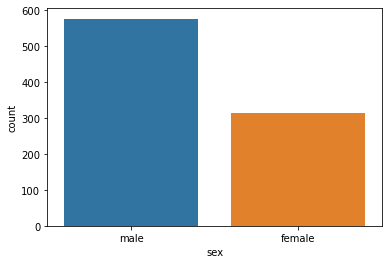

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##############################


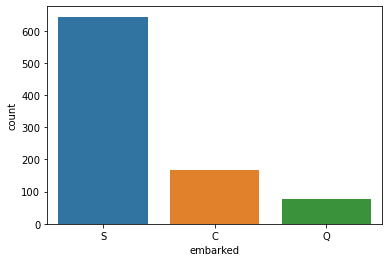

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##############################


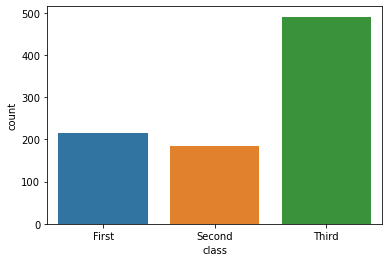

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##############################


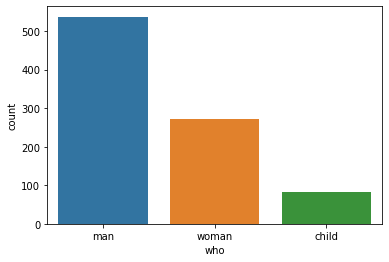

veri tipi bool
   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##############################


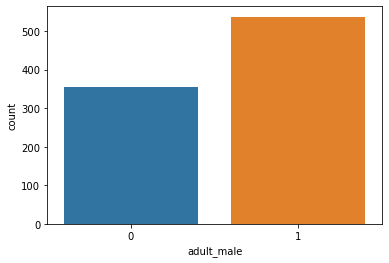

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##############################


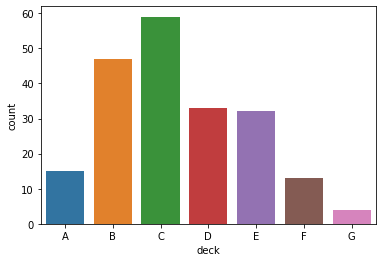

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##############################


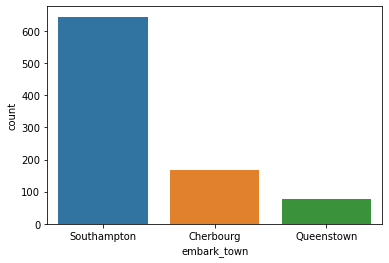

     alive      Ratio
no     549  61.616162
yes    342  38.383838
##############################


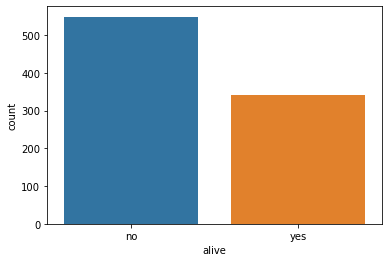

veri tipi bool
   alone     Ratio
1    537  60.26936
0    354  39.73064
##############################


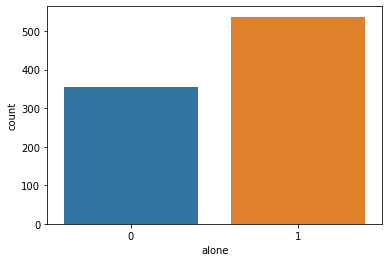

   survived      Ratio
0       549  61.616162
1       342  38.383838
##############################


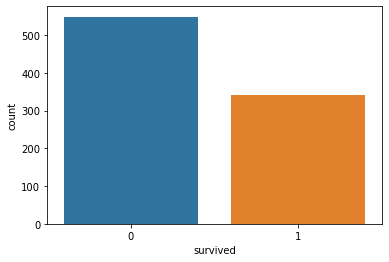

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
##############################


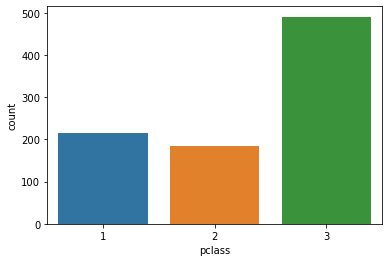

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##############################


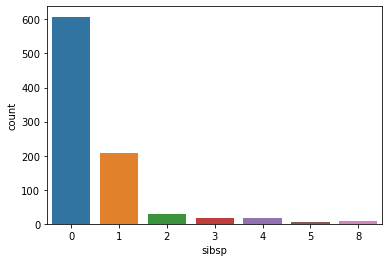

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##############################


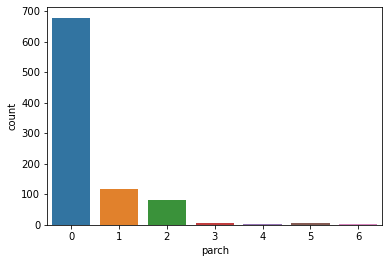

In [56]:
#veri tipi bool olanlar sütun grafiği çizilemiyor. bu yüzden dönüştürdük
#katergorik değişkenler için en uygunu sütun grafiğidir.
for col in cat_cols:
    if df[col].dtypes == "bool":
        print("veri tipi bool")
        df[col]=df[col].astype(int)
        cat_summary(df,col,plot = True)
    else:
        cat_summary(df,col,plot = True)